In [1]:
import pandas as pd

# Load the dataset
crime_data = pd.read_csv("C:\\Users\\Maniesh M\\Downloads\\crime datasets\\CJA07 - Recorded Crime Offences Under Reservation.csv")

# Display the first few rows of the dataset to get an overview
crime_data.head()


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C03037V03742,Garda Station,C02480V03003,Type of Offence,UNIT,VALUE
0,CJA07,Recorded crime incidents,2003,2003,35301,"35301 Abbeyfeale, Limerick Division",3,"Attempts/threats to murder, assaults, harassme...",Number,18.0
1,CJA07,Recorded crime incidents,2003,2003,35301,"35301 Abbeyfeale, Limerick Division",4,Dangerous or negligent acts,Number,14.0
2,CJA07,Recorded crime incidents,2003,2003,35301,"35301 Abbeyfeale, Limerick Division",5,Kidnapping and related offences,Number,0.0
3,CJA07,Recorded crime incidents,2003,2003,35301,"35301 Abbeyfeale, Limerick Division",6,"Robbery, extortion and hijacking offences",Number,0.0
4,CJA07,Recorded crime incidents,2003,2003,35301,"35301 Abbeyfeale, Limerick Division",7,Burglary and related offences,Number,27.0


In [2]:
# Check for missing values
crime_data.isnull().sum()


STATISTIC             0
STATISTIC Label       0
TLIST(A1)             0
Year                  0
C03037V03742          0
Garda Station         0
C02480V03003          0
Type of Offence       0
UNIT                  0
VALUE              1418
dtype: int64

In [3]:
# Display data types and general information
crime_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142128 entries, 0 to 142127
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATISTIC        142128 non-null  object 
 1   STATISTIC Label  142128 non-null  object 
 2   TLIST(A1)        142128 non-null  int64  
 3   Year             142128 non-null  int64  
 4   C03037V03742     142128 non-null  int64  
 5   Garda Station    142128 non-null  object 
 6   C02480V03003     142128 non-null  int64  
 7   Type of Offence  142128 non-null  object 
 8   UNIT             142128 non-null  object 
 9   VALUE            140710 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 10.8+ MB


## Exploratory Data Analysis (EDA)

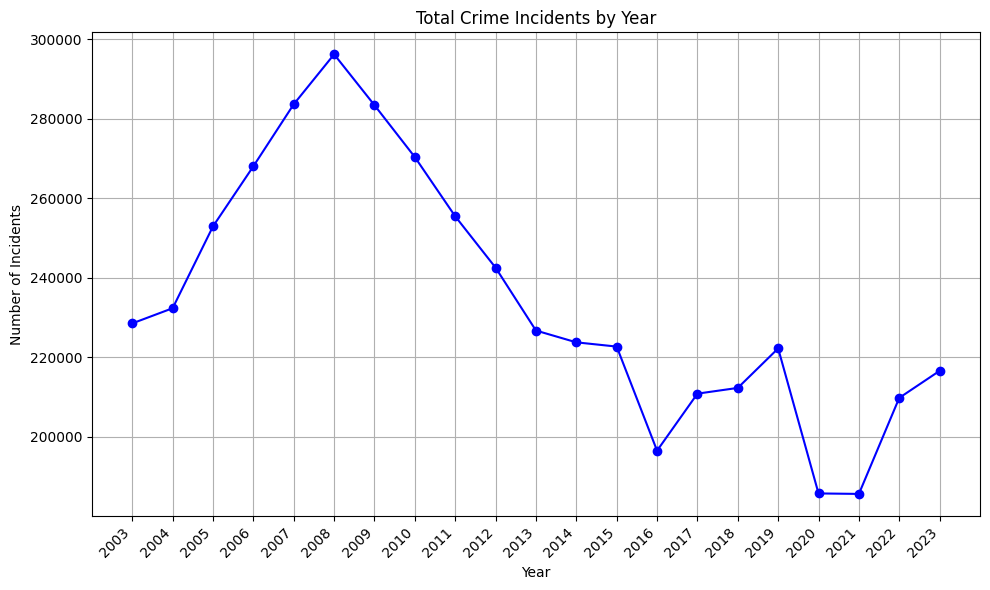

In [4]:
import matplotlib.pyplot as plt

# Group by year and sum the values
yearly_crime = crime_data.groupby('Year')['VALUE'].sum()

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_crime.index, yearly_crime.values, marker='o', linestyle='-', color='b')
plt.title('Total Crime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Ensure the x-axis (Year) has integer ticks only and rotate them for better readability
plt.xticks(ticks=yearly_crime.index.astype(int), rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()  # Ensures the plot fits well within the figure boundaries
plt.show()


## Analyze crime incidents by location (Garda Stations)

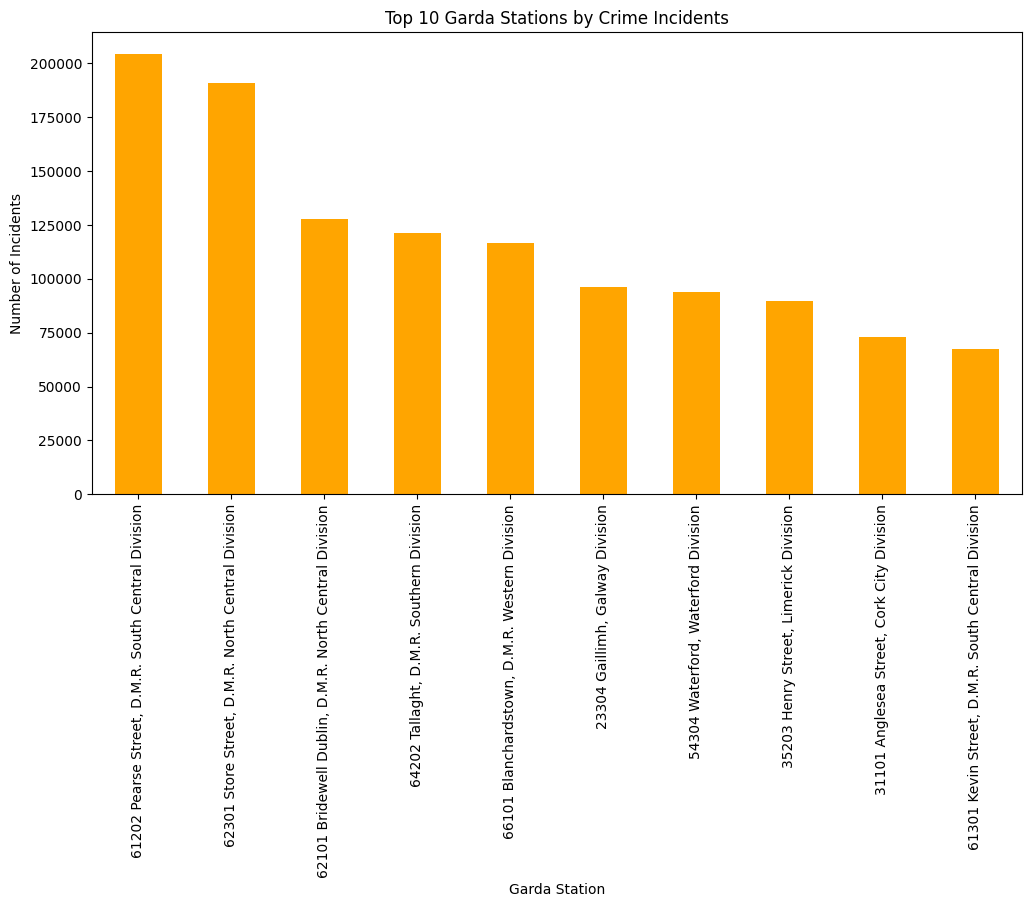

In [5]:
# Group by Garda Station and sum the values
station_crime = crime_data.groupby('Garda Station')['VALUE'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 Garda Stations by crime incidents
plt.figure(figsize=(12, 6))
station_crime.plot(kind='bar', color='orange')
plt.title('Top 10 Garda Stations by Crime Incidents')
plt.xlabel('Garda Station')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()


## Data Preparation for Predictive Modeling
### Convert the dataset into a time series format


In [6]:
# Group by Year and Garda Station, and sum the values
crime_timeseries = crime_data.groupby(['Year', 'Garda Station'])['VALUE'].sum().unstack().fillna(0)

# Display the new time series data
crime_timeseries.head()


Garda Station,"11101 Bailieboro, Cavan/Monaghan Division","11102 Ballyjamesduff, Cavan/Monaghan Division","11103 Cootehill, Cavan/Monaghan Division","11104 Kingscourt, Cavan/Monaghan Division","11105 Mullagh, Cavan/Monaghan Division","11106 Shercock, Cavan/Monaghan Division","11108 Virginia, Cavan/Monaghan Division","11201 Ballyconnell, Cavan/Monaghan Division","11203 Belturbet, Cavan/Monaghan Division","11204 Blacklion, Cavan/Monaghan Division",...,"65203 Dun Laoghaire, D.M.R. Eastern Division","65205 Shankill, D.M.R. Eastern Division","66101 Blanchardstown, D.M.R. Western Division","66102 Cabra, D.M.R. Western Division","66103 Finglas, D.M.R. Western Division","66201 Ballyfermot, D.M.R. Western Division","66202 Clondalkin, D.M.R. Western Division","66203 Rathcoole, D.M.R. Western Division","66301 Lucan, D.M.R. Western Division","66302 Ronanstown, D.M.R. Western Division"
Year,,,,,,,,,,,,,,,,,,,,,
2003,262.0,76.0,270.0,137.0,29.0,43.0,136.0,92.0,112.0,40.0,...,2992.0,1129.0,3790.0,1214.0,2273.0,2125.0,2347.0,532.0,1813.0,2221.0
2004,272.0,120.0,316.0,143.0,54.0,57.0,145.0,95.0,118.0,44.0,...,2700.0,1183.0,4684.0,1335.0,2458.0,2126.0,2343.0,602.0,1488.0,2200.0
2005,239.0,139.0,397.0,177.0,68.0,43.0,224.0,117.0,137.0,57.0,...,2744.0,1424.0,5401.0,1245.0,2571.0,2266.0,2353.0,695.0,1733.0,2346.0
2006,361.0,170.0,355.0,225.0,68.0,54.0,195.0,146.0,142.0,41.0,...,2946.0,1392.0,5640.0,1137.0,2852.0,2504.0,2781.0,612.0,1627.0,2709.0
2007,330.0,182.0,330.0,174.0,83.0,67.0,222.0,199.0,187.0,25.0,...,3171.0,1330.0,5543.0,1507.0,3240.0,2601.0,2828.0,619.0,1527.0,2909.0


In [7]:
# train and test split
# Splitting the data into training (80%) and testing (20%) sets
train_data = crime_timeseries.iloc[:-2]  # Training data until the second-to-last year
test_data = crime_timeseries.iloc[-2:]   # Test data for the last two years


In [8]:
test_data

Garda Station,"11101 Bailieboro, Cavan/Monaghan Division","11102 Ballyjamesduff, Cavan/Monaghan Division","11103 Cootehill, Cavan/Monaghan Division","11104 Kingscourt, Cavan/Monaghan Division","11105 Mullagh, Cavan/Monaghan Division","11106 Shercock, Cavan/Monaghan Division","11108 Virginia, Cavan/Monaghan Division","11201 Ballyconnell, Cavan/Monaghan Division","11203 Belturbet, Cavan/Monaghan Division","11204 Blacklion, Cavan/Monaghan Division",...,"65203 Dun Laoghaire, D.M.R. Eastern Division","65205 Shankill, D.M.R. Eastern Division","66101 Blanchardstown, D.M.R. Western Division","66102 Cabra, D.M.R. Western Division","66103 Finglas, D.M.R. Western Division","66201 Ballyfermot, D.M.R. Western Division","66202 Clondalkin, D.M.R. Western Division","66203 Rathcoole, D.M.R. Western Division","66301 Lucan, D.M.R. Western Division","66302 Ronanstown, D.M.R. Western Division"
Year,,,,,,,,,,,,,,,,,,,,,
2022,201.0,125.0,148.0,107.0,32.0,35.0,155.0,82.0,138.0,9.0,...,2045.0,737.0,5931.0,902.0,2941.0,1548.0,2063.0,1138.0,1526.0,3360.0
2023,166.0,186.0,133.0,108.0,34.0,44.0,207.0,91.0,77.0,36.0,...,2085.0,768.0,5169.0,974.0,2571.0,1545.0,2135.0,1297.0,1538.0,2959.0


In [12]:
pip install pmdarima  


   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 330.3 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/614.7 kB 653.6 kB/s eta 0:00:01
   ------------- -------------------------- 215.0/614.7 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------------------- ------------------- 1.4/2.8 MB 30.5 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 35.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 25.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Maniesh M\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test to check stationarity
result = adfuller(yearly_crime)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# A p-value less than 0.05 indicates the data is stationary.


ADF Statistic: -7.866031136435927
p-value: 5.132001758527908e-12


In [14]:
import pmdarima as pm

# Fit the ARIMA model
model = pm.auto_arima(yearly_crime, start_p=1, start_q=1,
                      test='adf',       # ADF test is already passed
                      seasonal=False,    # No seasonality in data
                      trace=True,        # Show ARIMA fitting process
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# Print model summary to understand the parameters of the fitted ARIMA model
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=436.072, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=435.261, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=435.096, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=434.700, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=433.361, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.246 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -215.680
Date:                Wed, 09 Oct 2024   AIC                            433.361
Time:                        00:22:56   BIC                            434.305
Sample:                             0   HQIC                           433.521
                                 - 21                                         
Co

C:\Users\Maniesh M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Maniesh M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


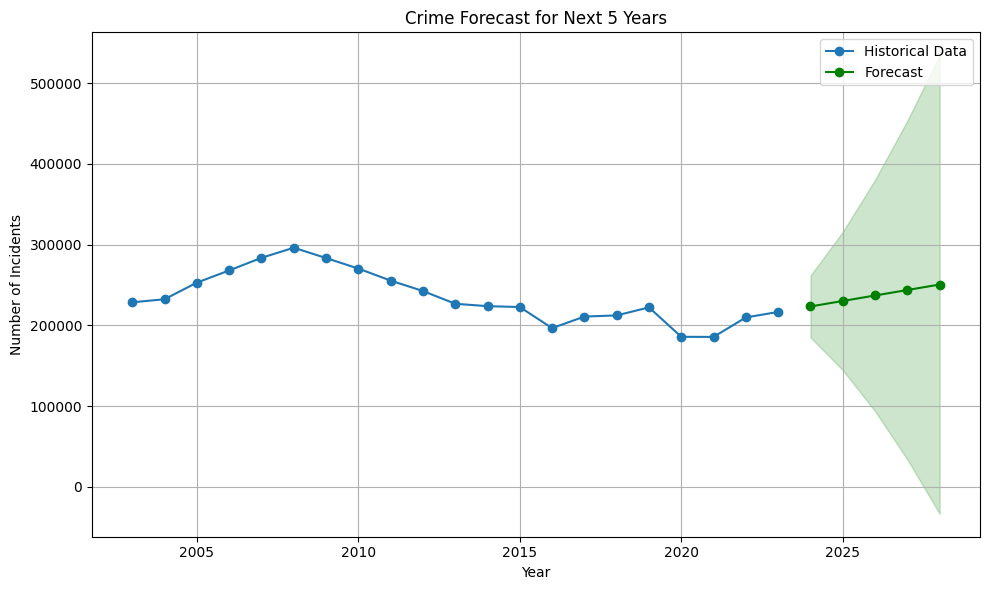

In [15]:
# Forecast the next 5 years
n_years = 5
forecast, conf_int = model.predict(n_periods=n_years, return_conf_int=True)

# Create future year labels
future_years = [yearly_crime.index[-1] + i for i in range(1, n_years+1)]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(yearly_crime.index, yearly_crime.values, label='Historical Data', marker='o')
plt.plot(future_years, forecast, label='Forecast', color='green', marker='o')
plt.fill_between(future_years, conf_int[:, 0], conf_int[:, 1], color='green', alpha=0.2)
plt.title('Crime Forecast for Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.2/13.3 MB 3.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/13.3 MB 6.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/13.3 MB 10.7 MB/s eta 0:00:02
   ------------ --------------------------- 4.2/13.3 MB 19.3 MB/s eta 0:00:01
   ------------------ --------------------- 6.1/13.3 MB 23.0 MB/s eta 0:00:01
   ------------------------ --------------- 8.1/13.3 MB 27.1 MB/s eta 0:00:01
   ---------------------------------- ----- 11.4/13.3 MB 50.4 MB/s eta 0:00:01
   ---------------------------------------  13.3/13.3 MB 59.5 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 50.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:--
   ---------------------------------------- 94.5/94.5 kB ? eta 0:00:00
   ------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Maniesh M\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
# Get unique Garda Stations
unique_stations = crime_data['Garda Station'].unique()

# Display the number of unique stations and their names
print(f"Number of unique Garda Stations: {len(unique_stations)}")
print(unique_stations)


Number of unique Garda Stations: 564
['35301 Abbeyfeale, Limerick Division'
 '41201 Abbeyleix, Laois/Offaly Division' '35302 Adare, Limerick Division'
 '54101 Aglish, Waterford Division' '23101 Ahascragh, Galway Division'
 '12501 Ailt an Chorraiin, Donegal Division'
 '12502 An Bun Beag, Donegal Division'
 '12503 An Charraig, Donegal Division'
 '23601 An Cheathru Rua, Galway Division'
 '12504 An Clochain Liath, Donegal Division'
 '34101 An Coirean, Kerry Division' '12401 An Craoslach, Donegal Division'
 '12402 An Fail Carrach, Donegal Division'
 '23201 An Maim, Galway Division' '54102 An Rinn, Waterford Division'
 '23602 An Spideal, Galway Division'
 '31101 Anglesea Street, Cork City Division'
 '34303 Annascaul, Kerry Division' '23301 Aran More, Galway Division'
 '12507 Ard an Raitha, Donegal Division' '14101 Ardee, Louth Division'
 '34304 Ardfert, Kerry Division' '51101 Ardfinnan, Tipperary Division'
 '54103 Ardmore, Waterford Division'
 '35201 Ardnacrusha, Limerick Division' '23401 Ar

In [21]:
# Use a regular expression to extract the division part, which is after the last comma
crime_data['Division'] = crime_data['Garda Station'].str.extract(r',\s*(.*Division)')

# Display the first few rows to verify the extraction
crime_data[['Garda Station', 'Division']].head()


,Garda Station,Division
0,"35301 Abbeyfeale, Limerick Division",Limerick Division
1,"35301 Abbeyfeale, Limerick Division",Limerick Division
2,"35301 Abbeyfeale, Limerick Division",Limerick Division
3,"35301 Abbeyfeale, Limerick Division",Limerick Division
4,"35301 Abbeyfeale, Limerick Division",Limerick Division


In [22]:
# Group by Division and sum the crime incidents
division_counts = crime_data.groupby('Division')['VALUE'].sum()

# Display the division counts
print(division_counts)


Division
Cavan/Monaghan Division               111585.0
Clare Division                         85153.0
Co Cork, Cork City Division            13832.0
Co Cork, Cork North Division            2200.0
Co Donegal, Donegal Division            2076.0
Co Dublin, D.M.R. Eastern Division     29510.0
Co Kerry, Cork West Division            1342.0
Co Louth, Louth Division                5010.0
Co Mayo, Mayo Division                   847.0
Co Tipperary, Tipperary Division        2380.0
Co Waterford, Waterford Division        1470.0
Co. Cork, Cork West Division            2263.0
Co. Kerry, Kerry Division                969.0
Co. Offaly, Laois/Offaly Division       1078.0
Co. Tipperary, Tipperary Division        663.0
Cork City Division                    275175.0
Cork North Division                    97987.0
Cork West Division                     64490.0
D.M.R. Eastern Division               157580.0
D.M.R. North Central Division         416565.0
D.M.R. Northern Division              358000.0
D.M.

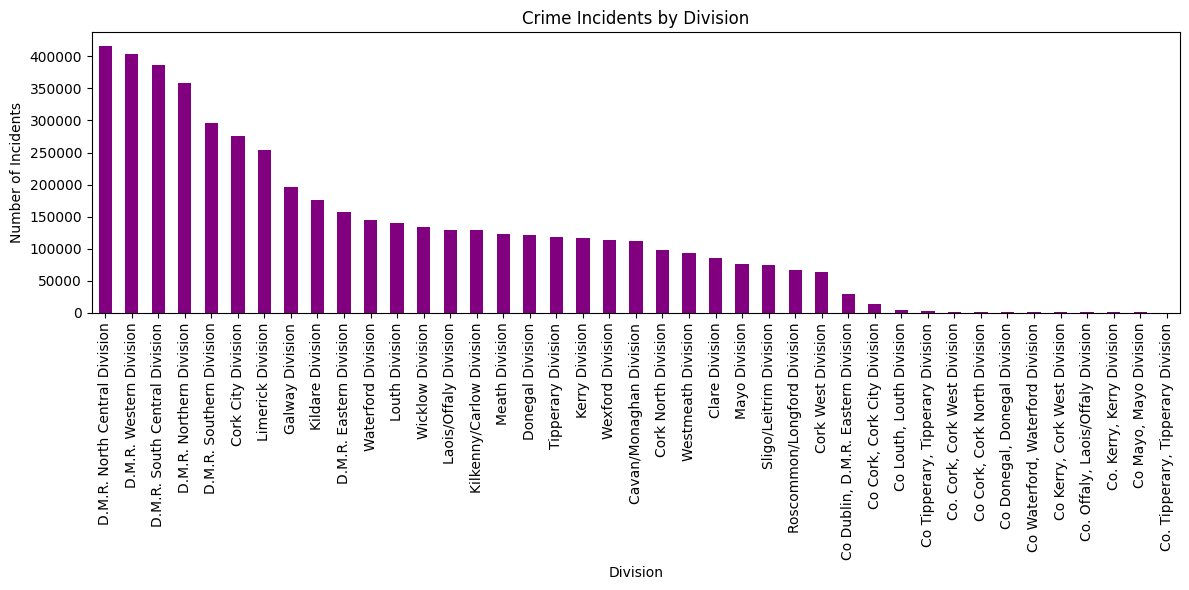

In [23]:
# Sort the division counts in descending order
sorted_division_counts = division_counts.sort_values(ascending=False)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sorted_division_counts.plot(kind='bar', color='purple')
plt.title('Crime Incidents by Division')
plt.xlabel('Division')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [24]:
pip install folium


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Maniesh M\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Load the roads shapefile
roads = gpd.read_file("C:\\Users\\Maniesh M\\Downloads\\crime datasets\\gis_osm_roads_free_1.shp")

# Display the first few rows of the roads data to verify
print(roads.head())


   osm_id  code       fclass                 name    ref oneway  maxspeed  \
0  151364  5114    secondary         Cardiff Lane   R813      B        50   
1  151368  5114    secondary  Parnell Square East   R132      B        30   
2  367947  5115     tertiary       Hansfield Road  L2223      B        80   
3  367952  5122  residential     Charnwood Avenue   None      B        50   
4  508603  5115     tertiary        Shelerin Road  L3018      B        50   

   layer bridge tunnel                                           geometry  
0      0      F      F  LINESTRING (-6.24086 53.34416, -6.24082 53.344...  
1      0      F      F  LINESTRING (-6.26353 53.35454, -6.26345 53.35446)  
2      0      F      F  LINESTRING (-6.44433 53.40122, -6.44427 53.401...  
3      0      F      F  LINESTRING (-6.41454 53.38661, -6.41346 53.386...  
4      0      F      F  LINESTRING (-6.40938 53.38296, -6.40936 53.383...  


In [32]:
# Example crime data with Garda division coordinates (latitude and longitude)
crime_data = pd.DataFrame({
    'Division': ['D.M.R. Western Division', 'D.M.R. Northern Division', 'Cork City Division'],
    'Latitude': [53.345, 53.350, 51.898],
    'Longitude': [-6.267, -6.260, -8.473],
    'Crime_Count': [1500, 1300, 1200]  # Example crime count data
})

# Convert the crime data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(crime_data['Longitude'], crime_data['Latitude'])]
crime_gdf = GeoDataFrame(crime_data, geometry=geometry)

# Display the crime data GeoDataFrame
print(crime_gdf.head())


                   Division  Latitude  Longitude  Crime_Count  \
0   D.M.R. Western Division    53.345     -6.267         1500   
1  D.M.R. Northern Division    53.350     -6.260         1300   
2        Cork City Division    51.898     -8.473         1200   

                geometry  
0  POINT (-6.267 53.345)  
1    POINT (-6.26 53.35)  
2  POINT (-8.473 51.898)  


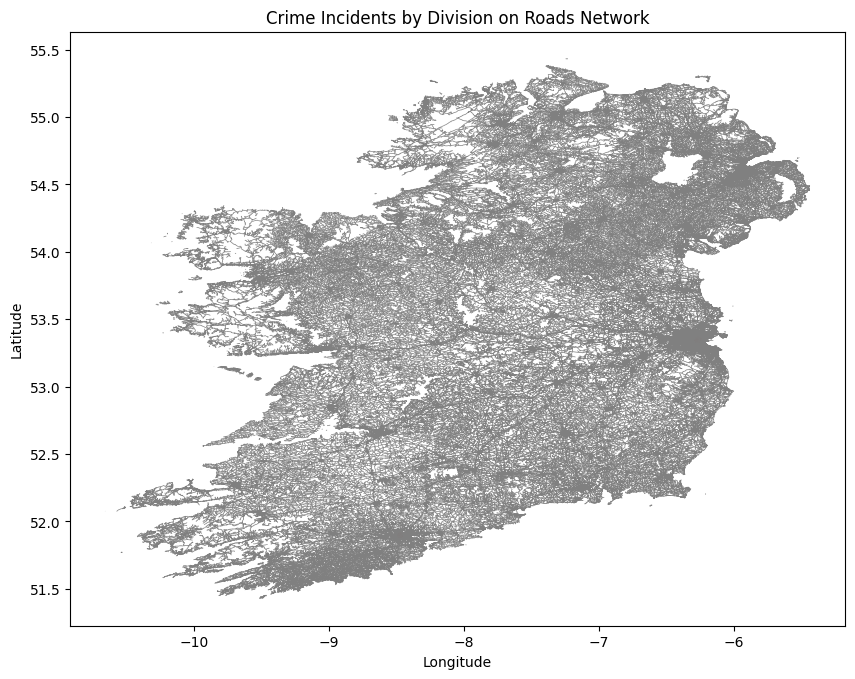

In [33]:
# Plot the roads shapefile as a base map
fig, ax = plt.subplots(figsize=(10, 10))
roads.plot(ax=ax, color='gray', linewidth=0.5)

# Overlay the crime data on top of the roads
crime_gdf.plot(ax=ax, marker='o', color='red', markersize=crime_gdf['Crime_Count'] / 100, legend=True)

# Set plot title and labels
plt.title('Crime Incidents by Division on Roads Network')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
